In [1]:
def addTargetFile(dirName):
    ret = {}
    ret[dirName] = []
    ret[dirName].append("randR-32MB.txt")
    ret[dirName].append("randR-4KB.txt")
    ret[dirName].append("randW-32MB.txt")
    ret[dirName].append("randW-4KB.txt")
    ret[dirName].append("seqR-32MB.txt")
    ret[dirName].append("seqR-4KB.txt")
    ret[dirName].append("seqW-32MB.txt")
    ret[dirName].append("seqW-4KB.txt")
    return ret

ResultFile = []
ResultFile.append(addTargetFile("M1-MBA2020-1TB-SSD"))
ResultFile.append(addTargetFile("MP-1TB-SSD"))
ResultFile.append(addTargetFile("xeon01-1TB-SSD"))
ResultFile.append(addTargetFile("xeon01-2TB-KIOXIA-NVMe"))

data = {}
for k in ResultFile:
    for kk,vv in k.items():
        for name in vv:
            with open('results/'+kk+'/'+name) as f:
                df = json.load(f)
                name = name.replace(".txt", "")
                
                if "R" in name: # read case
                    name = name.replace("R", "")
                    if not kk in data.keys():
                        data[kk] = {}
                    if not "read" in data[kk].keys():
                        data[kk]['read'] = {}
                    if not name in data[kk]['read'].keys():
                        data[kk]['read'][name] = {}
                    data[kk]['read'][name]['bw'] = df['jobs'][0]['read']['bw'] * 1024
                    data[kk]['read'][name]['iops'] = int(df['jobs'][0]['read']['iops'])

                else: # write case
                    name = name.replace("W", "")
                    if not kk in data.keys():
                        data[kk] = {}
                    if not "write" in data[kk].keys():
                        data[kk]['write'] = {}
                    if not name in data[kk]['write'].keys():
                        data[kk]['write'][name] = {}

                    data[kk]['write'][name]['bw'] = df['jobs'][0]['write']['bw'] * 1024
                    data[kk]['write'][name]['iops'] = int(df['jobs'][0]['write']['iops'])
print()
if (0):
    for k, v in data.items():
        print(k)
        for kk, vv in v.items():
            print(kk)
            print(vv)
        print()
    print (data["xeon01-1TB-SSD"]["read"]["rand-32MB"]["bw"])

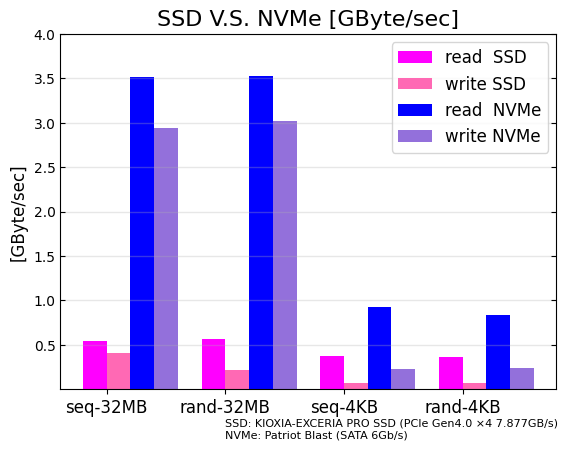

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

kind = "bw"
ylabel = "[GByte/sec]"

y1 = [
    data["xeon01-1TB-SSD"]["read"]["seq-32MB"][kind],
    data["xeon01-1TB-SSD"]["read"]["rand-32MB"][kind],
    data["xeon01-1TB-SSD"]["read"]["seq-4KB"][kind],
    data["xeon01-1TB-SSD"]["read"]["rand-4KB"][kind],
]

y2 = [
    data["xeon01-1TB-SSD"]["write"]["seq-32MB"][kind],
    data["xeon01-1TB-SSD"]["write"]["rand-32MB"][kind],
    data["xeon01-1TB-SSD"]["write"]["seq-4KB"][kind],
    data["xeon01-1TB-SSD"]["write"]["rand-4KB"][kind],
]

y3 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-4KB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-4KB"][kind],
]

y4 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["seq-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["rand-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["seq-4KB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["rand-4KB"][kind],
]


plt.title('SSD V.S. NVMe ' + ylabel, fontsize=16)
# plt.suptitle('SSD V.S. NVMe ' + ylabel, fontsize=16)
# plt.title('SSD: KIOXIA-EXCERIA PRO SSD (PCIe Gen4.0 ×4 7.877GB/s)\nNVMe: Patriot Blast (SATA 6Gb/s)                                           ', fontsize=8)
details = "SSD: KIOXIA-EXCERIA PRO SSD (PCIe Gen4.0 ×4 7.877GB/s)\nNVMe: Patriot Blast (SATA 6Gb/s)"
plt.text(1.1, -0.55*1000*1000*1000, details, fontsize=8)

width = 0.2
x1 = np.arange(len(y1))
p_y1 = plt.bar(x1,         y1, color='magenta', width=width, align='center')
p_y2 = plt.bar(x1+width,   y2, color='hotpink', width=width, align='center')
p_y3 = plt.bar(x1+width*2, y3, color='blue', width=width, align='center')
p_y4 = plt.bar(x1+width*3, y4, color='mediumpurple', width=width, align='center')

plt.ylabel(ylabel, fontsize=12)
plt.legend(
    (p_y1[0], p_y2[0], p_y3[0], p_y4[0]),
    ("read  SSD", "write SSD", "read  NVMe", "write NVMe"),
    loc='upper right', ncol=1, fontsize=12)
labels = ['seq-32MB', 'rand-32MB', 'seq-4KB', 'rand-4KB', ]

plt.grid(axis="y", alpha=0.3, lw=1)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
plt.subplots_adjust(bottom=0.14) # 余白

#y軸小数点以下3桁表示
# plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v):,d}'))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v)/(1000*1000*1000)}'))
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0e')) #y軸小数点以下3桁表示
# plt.ticklabel_format(style='plain',axis='y')
# plt.ticklabel_format(style='sci',axis='y', useMathText=True)

plt.xticks(x1 + width/2, labels, fontsize=12)
plt.ylim(1, 4 * 1000 * 1000 *1000)

plt.savefig('SSD-NVMe-bps.svg')
plt.savefig('SSD-NVMe-bps.png', format="png", dpi=264)
plt.show()

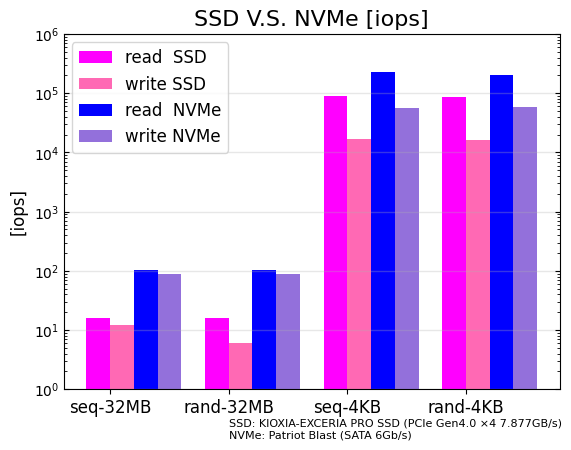

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

kind = "iops"
ylabel = "[iops]"

y1 = [
    data["xeon01-1TB-SSD"]["read"]["seq-32MB"][kind],
    data["xeon01-1TB-SSD"]["read"]["rand-32MB"][kind],
    data["xeon01-1TB-SSD"]["read"]["seq-4KB"][kind],
    data["xeon01-1TB-SSD"]["read"]["rand-4KB"][kind],
]

y2 = [
    data["xeon01-1TB-SSD"]["write"]["seq-32MB"][kind],
    data["xeon01-1TB-SSD"]["write"]["rand-32MB"][kind],
    data["xeon01-1TB-SSD"]["write"]["seq-4KB"][kind],
    data["xeon01-1TB-SSD"]["write"]["rand-4KB"][kind],
]

y3 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-4KB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-4KB"][kind],
]

y4 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["seq-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["rand-32MB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["seq-4KB"][kind],
    data["xeon01-2TB-KIOXIA-NVMe"]["write"]["rand-4KB"][kind],
]


plt.title('SSD V.S. NVMe ' + ylabel, fontsize=16)
# plt.suptitle('SSD V.S. NVMe ' + ylabel, fontsize=16)
# plt.annotate(1, 1, "text", (1, 0.5), (1.5, 0.7), fontsize=16)

details = "SSD: KIOXIA-EXCERIA PRO SSD (PCIe Gen4.0 ×4 7.877GB/s)\nNVMe: Patriot Blast (SATA 6Gb/s)"
# plt.text(1, 0.15, details, ha="left", va="bottom", fontsize=8)
# plt.text(1, 0.1, details, va="bottom", fontsize=8)
plt.text(1.1, 0.15, details, fontsize=8)

width = 0.2
x1 = np.arange(len(y1))
p_y1 = plt.bar(x1,         y1, color='magenta', width=width, align='center')
p_y2 = plt.bar(x1+width,   y2, color='hotpink', width=width, align='center')
p_y3 = plt.bar(x1+width*2, y3, color='blue', width=width, align='center')
p_y4 = plt.bar(x1+width*3, y4, color='mediumpurple', width=width, align='center')

plt.ylabel(ylabel, fontsize=12)
plt.legend(
    (p_y1[0], p_y2[0], p_y3[0], p_y4[0]),
    ("read  SSD", "write SSD", "read  NVMe", "write NVMe"),
    loc='upper left', ncol=1, fontsize=12)
labels = ['seq-32MB', 'rand-32MB', 'seq-4KB', 'rand-4KB', ]

plt.grid(axis="y", alpha=0.3, lw=1)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v)/(1000*1000*1000)}'))
plt.subplots_adjust(bottom=0.14) # 余白


plt.xticks(x1 + width/2, labels, fontsize=12)
plt.yscale("log")
plt.ylim(1, 1 * 1000 * 1000)
plt.savefig('SSD-NVMe-iops.svg')
plt.savefig('SSD-NVMe-iops.png', format="png", dpi=264)
plt.show()

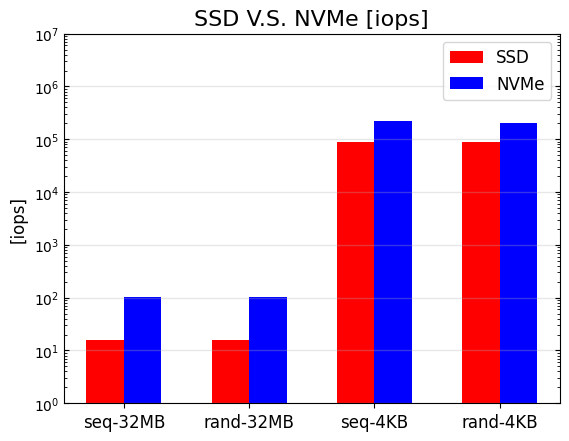

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

y1 = [
    data["xeon01-1TB-SSD"]["read"]["seq-32MB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["rand-32MB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["seq-4KB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["rand-4KB"]["iops"],
]

y2 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-32MB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-32MB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-4KB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-4KB"]["iops"],
]

plt.title('SSD V.S. NVMe [iops]', fontsize=16)
plt.ylabel('[iops]', fontsize=12)
labels = ['seq-32MB', 'rand-32MB', 'seq-4KB', 'rand-4KB', ]


width = 0.3
x1 = np.arange(len(y1))
p_y1 = plt.bar(x1,       y1, color='r', width=width, align='center')
p_y2 = plt.bar(x1+width, y2, color='b', width=width, align='center')
plt.legend((p_y1[0], p_y2[0]), ("SSD", "NVMe"), loc='upper right', ncol=1, fontsize=12)
plt.grid(axis="y", alpha=0.3, lw=1)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)


#y軸小数点以下3桁表示
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v):,d}'))
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0e')) #y軸小数点以下3桁表示
# plt.ticklabel_format(style='plain',axis='y')
# plt.ticklabel_format(style='sci',axis='y')
plt.xticks(x1 + width/2, labels, fontsize=12)
plt.yscale("log")
plt.ylim(1, 10 * 1000 * 1000)

# plt.savefig('SSD-NVMe-iops.svg')
plt.show()